In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radioactive11","key":"c5ab2f7c5e0a6f893f7aa2387952271c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:37<00:00, 24.2MB/s]
100% 2.29G/2.29G [00:37<00:00, 65.4MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip
!rm chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import shutil
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.3.0


In [ ]:
train_dir = "chest_xray/train/PNEUMONIA/"

train_pnemonia = os.listdir("chest_xray/train/PNEUMONIA/")
train_normal = os.listdir("chest_xray/train/NORMAL/")

In [ ]:
print("There are " + str(len(train_normal)) + " samples for normal scans.")
print("There are " + str(len(train_pnemonia)) + " samples for effected scans.")

There are 1341 samples for normal scans.
There are 3875 samples for effected scans.


In [ ]:
viral = []
bacterial = []

for img in train_pnemonia:
    if("bacteria" in img):
        bacterial.append(img)
    else:
        viral.append(img)
print("There are " + str(len(viral)) + " train samples for viral")
print("There are " + str(len(bacterial)) + " train samples for bacterial")

There are 1345 train samples for viral
There are 2530 train samples for bacterial


In [ ]:
if (not os.path.isdir(os.path.join(train_dir, "viral"))):
    os.mkdir(os.path.join(train_dir, "viral"))
    
if (not os.path.isdir(os.path.join(train_dir, "bacterial"))):
    os.mkdir(os.path.join(train_dir, "bacterial"))
    
for file in viral:
    shutil.move(os.path.join(train_dir, file), os.path.join(train_dir, "viral"))


bacterial = bacterial[:1345]
for file in bacterial:
    shutil.move(os.path.join(train_dir, file), os.path.join(train_dir, "bacterial"))

!rm chest_xray/train/PNEUMONIA/*.jpeg

In [ ]:
test_dir = "chest_xray/test/PNEUMONIA/"

test_pneumonia = os.listdir("chest_xray/test/PNEUMONIA/")
test_normal = os.listdir("chest_xray/test/NORMAL/")

In [ ]:
viral = []
bacterial = []

for img in test_pneumonia:
    if("bacteria" in img):
        bacterial.append(img)
    else:
        viral.append(img)
print("There are " + str(len(viral)) + " test samples for viral")
print("There are " + str(len(bacterial)) + " test samples for bacterial")

There are 148 test samples for viral
There are 242 test samples for bacterial


In [ ]:
if (not os.path.isdir(os.path.join(test_dir, "viral"))):
    os.mkdir(os.path.join(test_dir, "viral"))
    
if (not os.path.isdir(os.path.join(test_dir, "bacterial"))):
    os.mkdir(os.path.join(test_dir, "bacterial"))
    
for file in viral:
    shutil.move(os.path.join(test_dir, file), os.path.join(test_dir, "viral"))
    
for file in bacterial:
    shutil.move(os.path.join(test_dir, file), os.path.join(test_dir, "bacterial"))

In [ ]:
!pwd

/content


In [ ]:
%rm -r chest_xray/chest_xray/

In [ ]:
os.rename("chest_xray/test/NORMAL", "chest_xray/test/normal")
os.rename("chest_xray/train/NORMAL", "chest_xray/train/normal")

In [ ]:
shutil.move("chest_xray/test/normal", "chest_xray/test/PNEUMONIA")

'chest_xray/test/PNEUMONIA/normal'

In [ ]:
shutil.move("chest_xray/train/normal", "chest_xray/train/PNEUMONIA")

'chest_xray/train/PNEUMONIA/normal'

In [ ]:
os.rename("chest_xray/test/PNEUMONIA", "chest_xray/test/images")
os.rename("chest_xray/train/PNEUMONIA", "chest_xray/train/images")

In [ ]:
try:
  os.rmdir("chest_xray/train/images/.ipynb_checkpoints")
except:
  print("file doesnt exist")

file doesnt exist


In [ ]:
try:
  os.rmdir("chest_xray/test/images/.ipynb_checkpoints")
except:
  print("file doesnt exist")

file doesnt exist


In [ ]:
print("Training set detaiils: ")
for i in os.listdir("chest_xray/train/images/"):
    print(str(len(os.listdir("chest_xray/train/images/" + i))) + " " + i + " images")

Training set detaiils: 
1345 viral images
1341 normal images
1345 bacterial images


In [ ]:
print("Test set detaiils: ")
for i in os.listdir("chest_xray/test/images/"):
    print(str(len(os.listdir("chest_xray/test/images/" + i))) + " " + i + " images")

Test set detaiils: 
148 viral images
234 normal images
242 bacterial images


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
image_size = 224
batch_size = 64

datagen_train = ImageDataGenerator(rotation_range=5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


train_generator = datagen_train.flow_from_directory("chest_xray/train/images",
                                                   target_size = (image_size, image_size),
                                                   color_mode = "rgb",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)


Found 4031 images belonging to 3 classes.


In [ ]:
image_size = 224
batch_size = 64

datagen_test = ImageDataGenerator(rotation_range=5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_generator = datagen_test.flow_from_directory("chest_xray/test/images",
                                                   target_size = (image_size, image_size),
                                                   color_mode = "rgb",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = False)

Found 624 images belonging to 3 classes.


In [ ]:
VGG = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
VGG.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model = Sequential([
                    VGG,
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dense(units=256, activation='relu'),
                    Dense(units=3, activation='softmax')
])
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 21,204,035
Trainable params: 6,489,347
Non-trainable params: 14,714,688
_________________________________________________________________


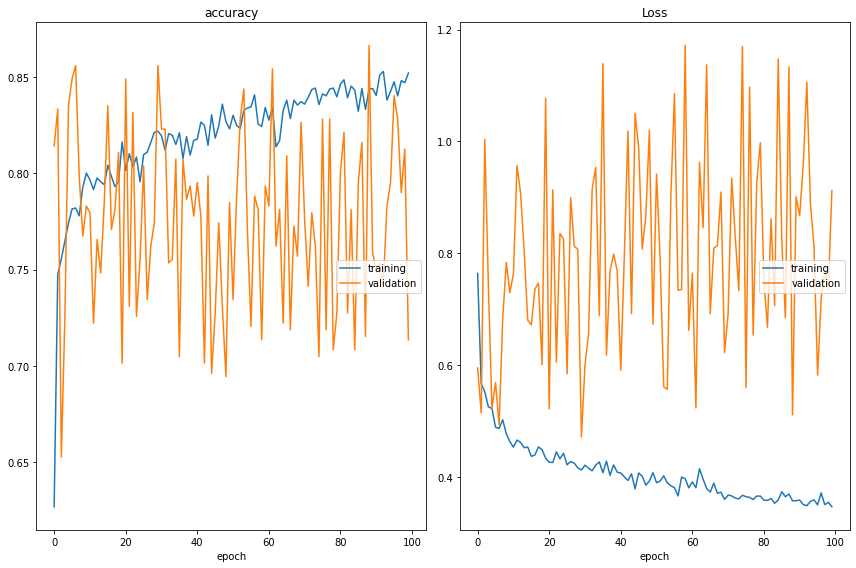

accuracy
	training         	 (min:    0.627, max:    0.853, cur:    0.852)
	validation       	 (min:    0.653, max:    0.866, cur:    0.714)
Loss
	training         	 (min:    0.347, max:    0.764, cur:    0.347)
	validation       	 (min:    0.471, max:    1.171, cur:    0.912)

Epoch 00100: saving model to vgg15.h5
62/62 [==============================] - 89s 1s/step - loss: 0.3466 - accuracy: 0.8520 - val_loss: 0.9119 - val_accuracy: 0.7135


In [ ]:
epochs = 100
steps_per_epoch = train_generator.n//train_generator.batch_size
test_steps = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("vgg15.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = test_generator,
    validation_steps = test_steps,
    callbacks=callbacks
)

In [ ]:
model_json = model.to_json()
with open("vgg16.json", "w") as json_file:
    json_file.write(model_json)